In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/fakesepsis_with_shock_index.csv")

# Inspect the data
print(data.head())
print(data.columns)


   Unnamed: 0          HR      SysBP     MeanBP      DiaBP         RR  \
0           0   89.042110  117.07348  82.677570  64.850464  15.203919   
1           1   81.783424  129.32523  93.431305  52.075700  11.470170   
2           2   51.497547  139.36650  76.298070  63.045296  18.750694   
3           3   93.606960   90.34055  93.397285  63.455574  18.755339   
4           4  104.303470  131.36095  91.159680  43.850853  22.216671   

          K         Na          Cl        Ca  ...  SpO2  Temp  PTT   PT  INR  \
0  4.333827  139.25275  107.581520  9.306758  ...   8.0   8.0  2.0  2.0  4.0   
1  4.678746  146.28258  100.063255  8.354657  ...   5.0   9.0  3.0  2.0  4.0   
2  3.786192  134.83234  108.606780  7.152756  ...   1.0   7.0  2.0  2.0  2.0   
3  4.110379  137.23538   97.512184  8.885168  ...   1.0   8.0  2.0  2.0  2.0   
4  4.705634  149.11530   99.576070  8.689161  ...   5.0   9.0  4.0  2.0  4.0   

   PatientID  Timepoints  SOFA  SIRS  Shock_Index  
0          0           0  10

In [ ]:
print(f"Shape of dataset: {data.shape}")
data.info()


Shape of dataset: (43280, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43280 entries, 0 to 43279
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43280 non-null  int64  
 1   HR              43280 non-null  float64
 2   SysBP           43280 non-null  float64
 3   MeanBP          43280 non-null  float64
 4   DiaBP           43280 non-null  float64
 5   RR              43280 non-null  float64
 6   K               43280 non-null  float64
 7   Na              43280 non-null  float64
 8   Cl              43280 non-null  float64
 9   Ca              43280 non-null  float64
 10  IonisedCa       43280 non-null  float64
 11  CO2             43280 non-null  float64
 12  Albumin         43280 non-null  float64
 13  Hb              43280 non-null  float64
 14  pH              43280 non-null  float64
 15  BE              43280 non-null  float64
 16  HCO3            43280 non-null  float64
 17  F

In [ ]:
data.describe()


,Unnamed: 0,HR,SysBP,MeanBP,DiaBP,RR,K,Na,Cl,Ca,...,SpO2,Temp,PTT,PT,INR,PatientID,Timepoints,SOFA,SIRS,Shock_Index
count,43280.000000,43280.000000,43280.000000,43280.000000,43280.000000,43280.000000,43280.000000,43280.000000,43280.000000,43280.000000,...,43280.000000,43280.000000,43280.000000,43280.000000,43280.000000,43280.000000,43280.000000,43280.000000,43280.000000,43280.000000
mean,21639.500000,89.156021,123.493091,81.161204,58.836322,21.582335,4.136593,139.995309,104.916893,8.018608,...,4.443253,4.827056,5.026895,4.881446,4.914556,1081.500000,9.500000,8.987985,2.550762,0.734019
std,12494.004162,16.300771,15.181199,9.642524,12.972895,4.428981,0.521571,5.364004,4.568178,0.995217,...,2.803477,2.980844,2.907553,2.920026,2.709304,624.700142,5.766348,2.966076,0.894108,0.169912
min,0.000000,25.054870,47.362354,38.948470,6.453602,5.797940,2.045011,114.453080,82.074900,3.793820,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.196994
25%,10819.750000,78.463032,114.428810,75.181682,50.402216,18.684556,3.778966,136.588428,102.083317,7.371213,...,2.000000,2.000000,3.000000,2.000000,2.000000,540.750000,4.750000,7.000000,2.000000,0.622935
50%,21639.500000,89.094583,123.668588,81.019117,58.896317,21.462270,4.120119,140.014030,105.229577,8.022016,...,5.000000,5.000000,5.000000,5.000000,5.000000,1081.500000,9.500000,9.000000,3.000000,0.720720
75%,32459.250000,99.818230,133.027530,86.908107,66.952658,24.281398,4.451249,143.568325,108.034022,8.664543,...,7.000000,8.000000,8.000000,8.000000,7.000000,1622.250000,14.250000,11.000000,3.000000,0.828020
max,43279.000000,163.812990,195.502690,132.440380,124.205430,41.827530,6.637725,160.998440,121.461090,13.674697,...,9.000000,9.000000,9.000000,9.000000,9.000000,2163.000000,19.000000,21.000000,4.000000,3.010042


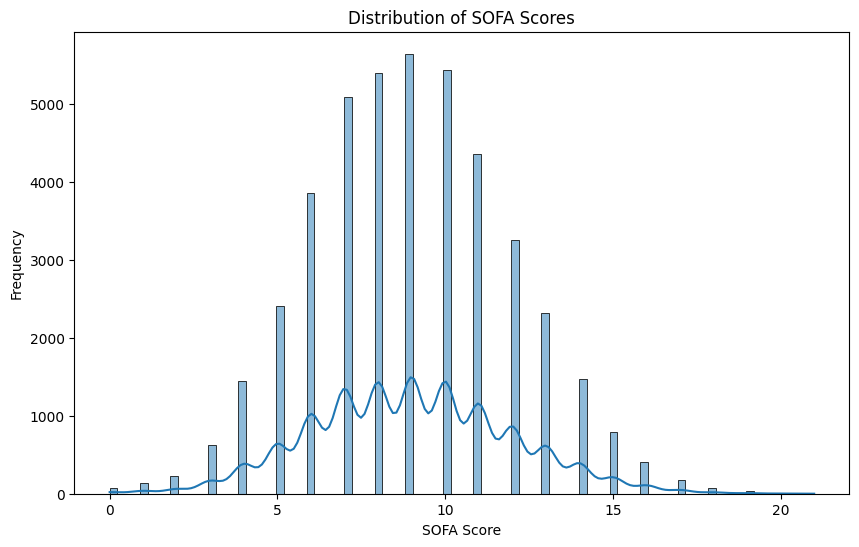

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['SOFA'], kde=True)
plt.title('Distribution of SOFA Scores')
plt.xlabel('SOFA Score')
plt.ylabel('Frequency')
plt.show()


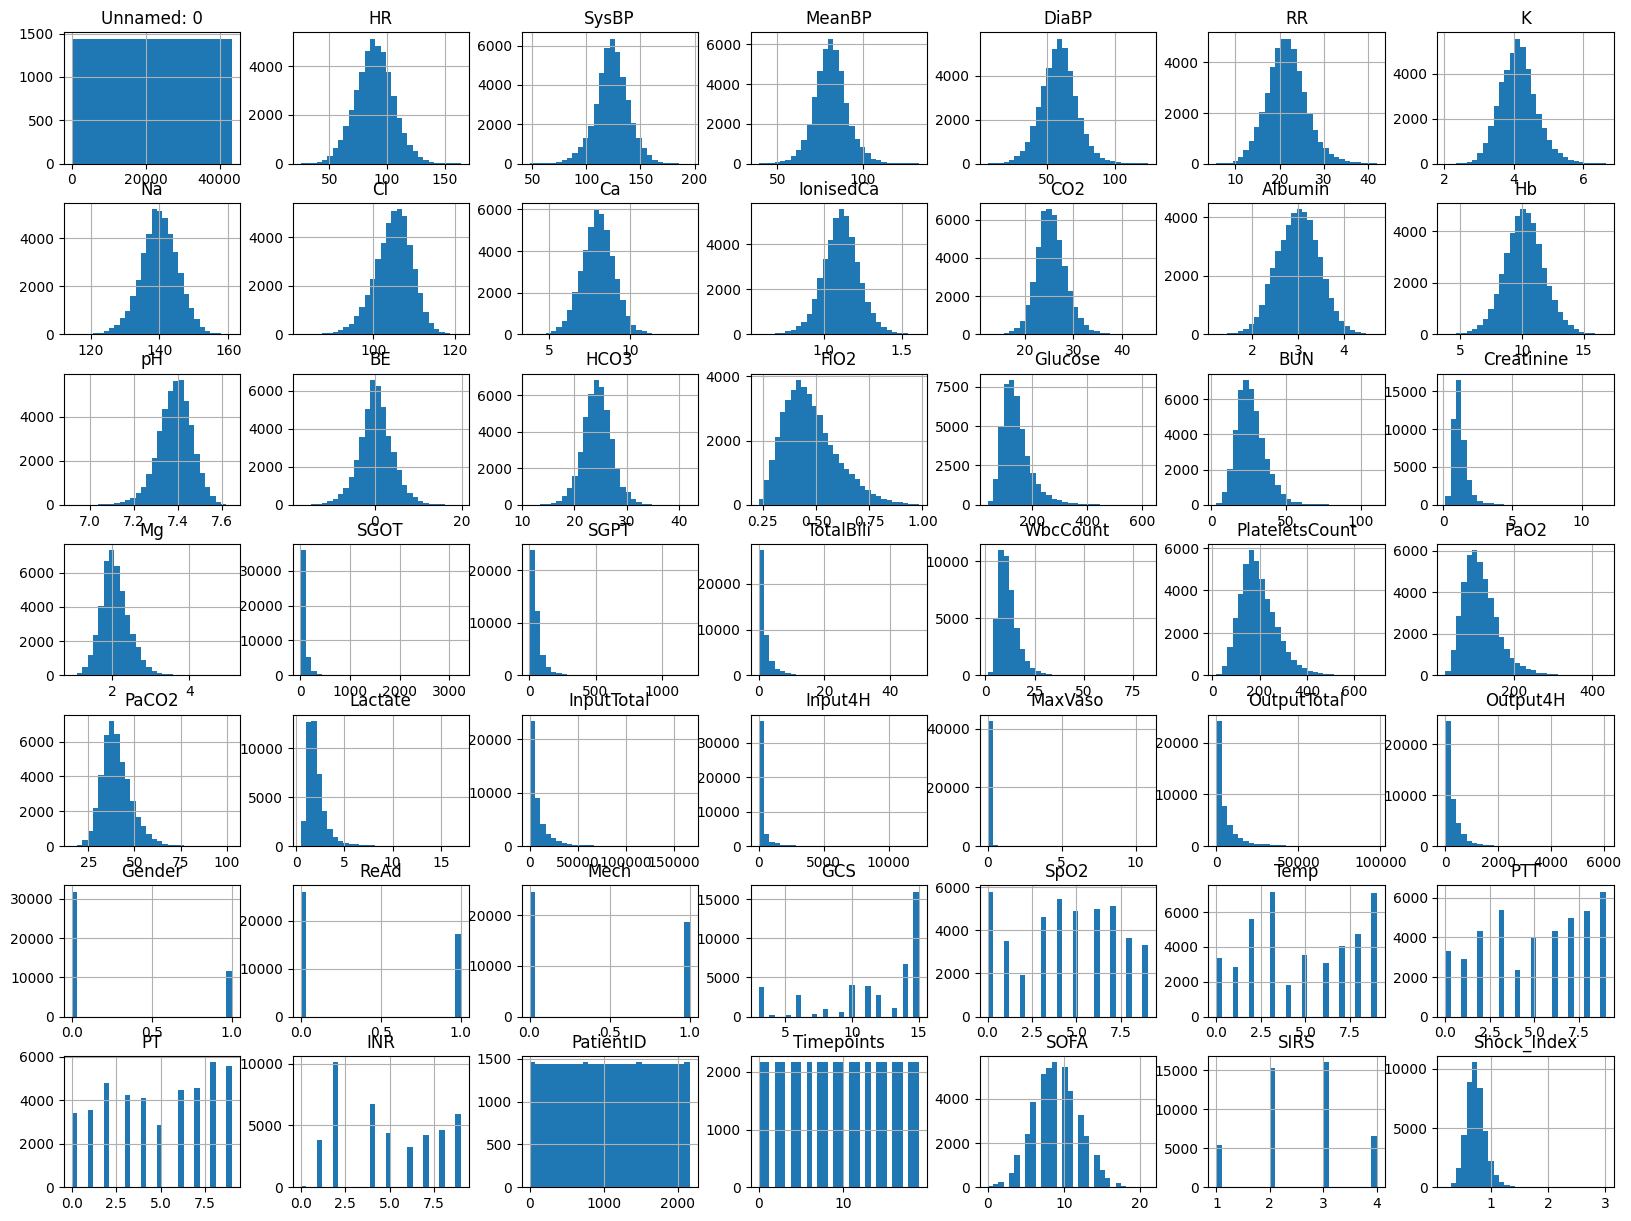

In [ ]:
data.hist(bins=30, figsize=(20, 15))
plt.show()


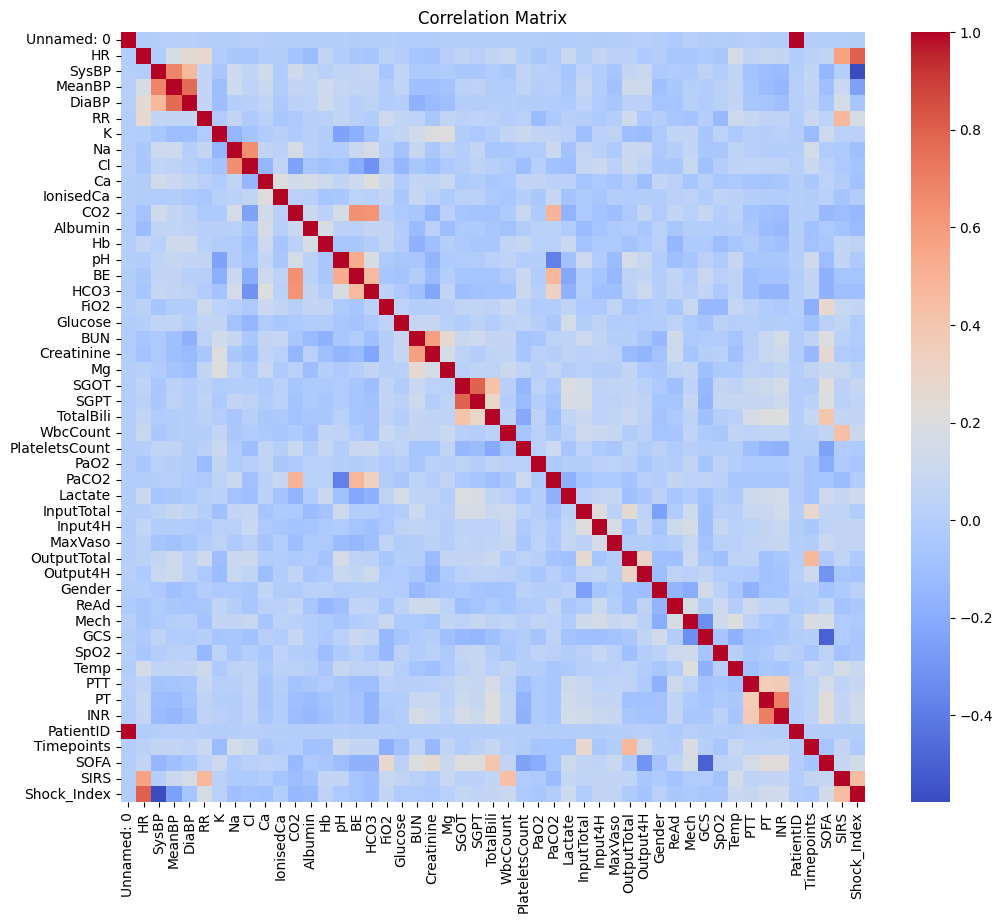

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


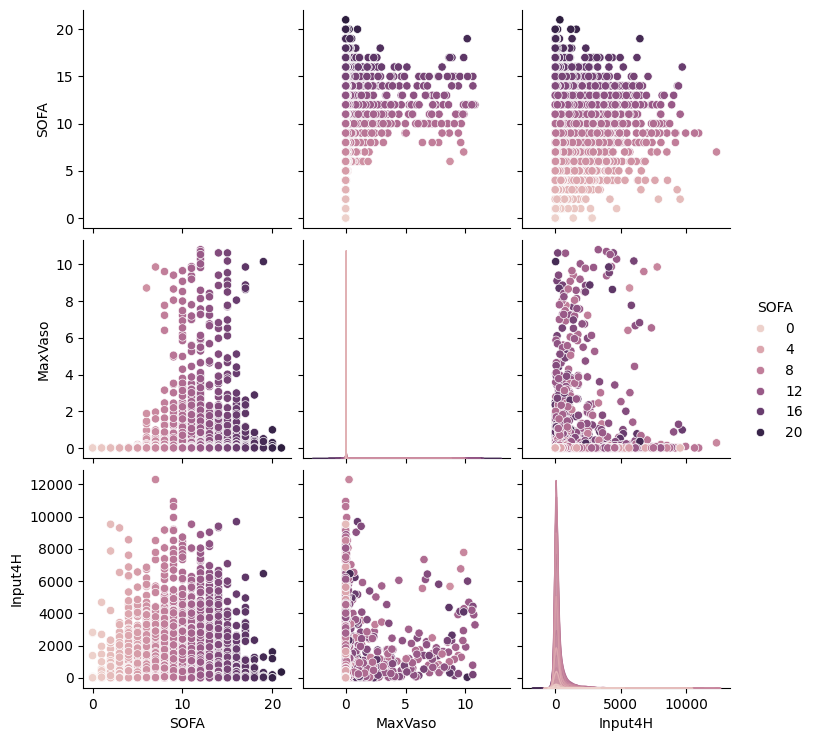

In [ ]:
sns.pairplot(data, vars=['SOFA', 'MaxVaso', 'Input4H'], hue='SOFA')
plt.show()


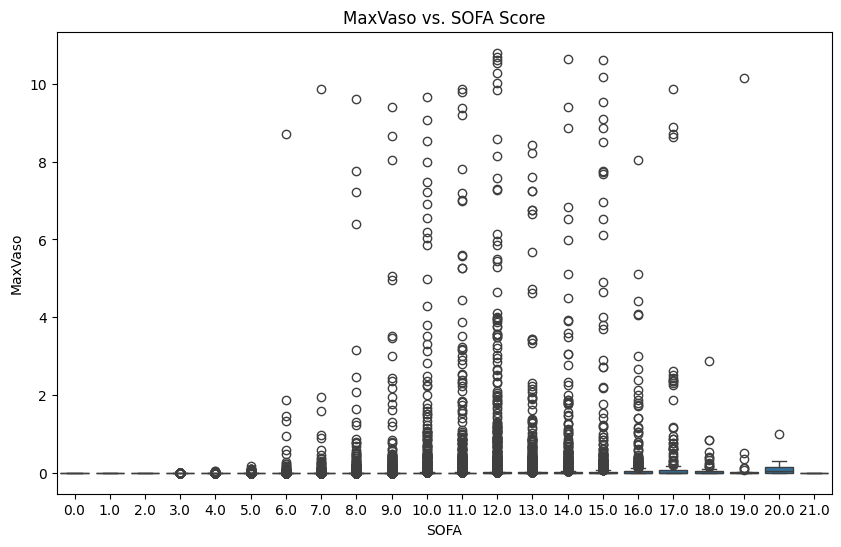

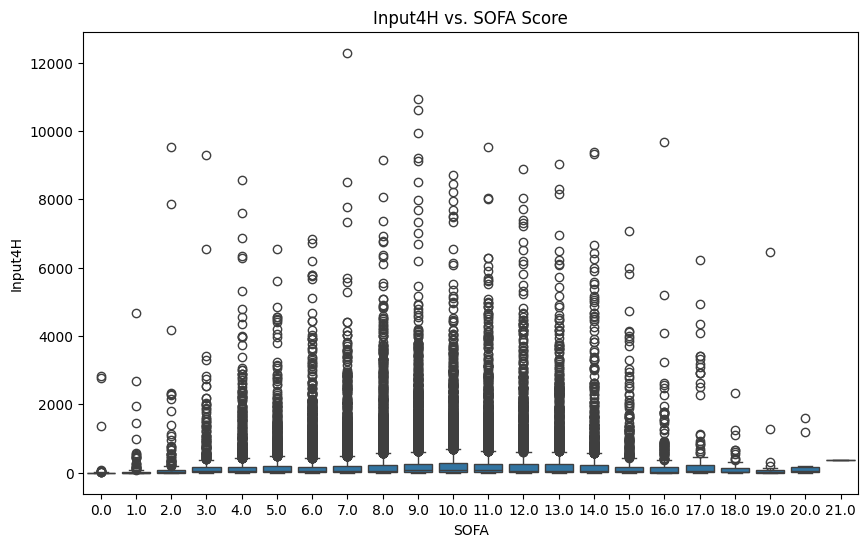

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SOFA', y='MaxVaso', data=data)
plt.title('MaxVaso vs. SOFA Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='SOFA', y='Input4H', data=data)
plt.title('Input4H vs. SOFA Score')
plt.show()


In [ ]:
import numpy as np

# Define the columns for state features and action features
state_cols = ['SOFA']  # Example state columns
action_cols = ['MaxVaso', 'Input4H']  # Medication columns
target_cols = state_cols  # Predicting the next state vector

def prepare_time_series_data(data, state_cols, action_cols, target_cols, history_length=10):
    X, y = [], []
    grouped = data.groupby('PatientID')
    for patient_id, group in grouped:
        group = group.sort_values(by='Timepoints')
        for i in range(history_length, len(group)):
            # Extract historical state-action pairs
            historical_data = group.iloc[i-history_length:i]
            states = historical_data[state_cols].values
            actions = historical_data[action_cols].values
            target = group[target_cols].iloc[i].values  # Assuming target is the next time point values for all state features

            # Flatten the historical data into a single feature vector
            h_t = np.concatenate([np.concatenate([states[j], actions[j]]) for j in range(history_length)])
            X.append(h_t)
            y.append(target)
    return np.array(X), np.array(y)

X, y = prepare_time_series_data(data, state_cols, action_cols, target_cols)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the neural network architecture
model = Sequential([
    Dense(64, input_shape=(X.shape[1],)),
    ReLU(),
    BatchNormalization(),
    Dense(32),
    ReLU(),
    BatchNormalization(),
    Dense(len(state_cols))  # Output layer for predicting the next state vector
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Summary of the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                1984      
                                                                 
 re_lu_6 (ReLU)              (None, 64)                0         
                                                                 
 batch_normalization_6 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 re_lu_7 (ReLU)              (None, 32)                0         
                                                                 
 batch_normalization_7 (Bat  (None, 32)                128       
 chNormalization)                                     

Epoch 1/100
433/433 [==============================] - 3s 4ms/step - loss: 45.9916 - val_loss: 10.0728
Epoch 2/100
433/433 [==============================] - 2s 5ms/step - loss: 7.7760 - val_loss: 6.7582
Epoch 3/100
433/433 [==============================] - 2s 5ms/step - loss: 6.6878 - val_loss: 6.0039
Epoch 4/100
433/433 [==============================] - 1s 3ms/step - loss: 6.0078 - val_loss: 5.4765
Epoch 5/100
433/433 [==============================] - 1s 2ms/step - loss: 5.3999 - val_loss: 5.0969
Epoch 6/100
433/433 [==============================] - 2s 4ms/step - loss: 5.1313 - val_loss: 4.4129
Epoch 7/100
433/433 [==============================] - 2s 5ms/step - loss: 4.9740 - val_loss: 4.8016
Epoch 8/100
433/433 [==============================] - 2s 5ms/step - loss: 4.8709 - val_loss: 4.4267
Epoch 9/100
433/433 [==============================] - 1s 2ms/step - loss: 4.8307 - val_loss: 4.3053
Epoch 10/100
433/433 [==============================] - 1s 3ms/step - loss: 4.7188 - val_

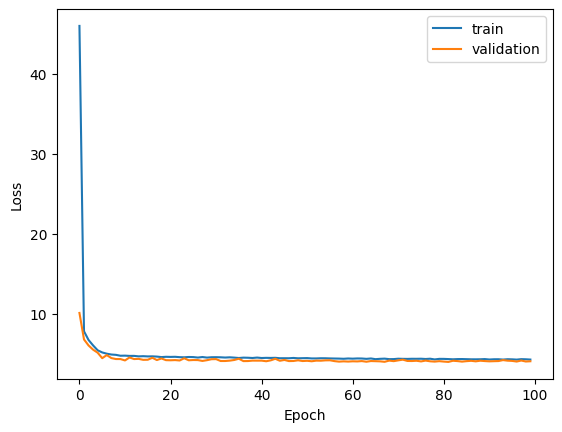

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
num_epochs = 100  # Adjust as needed
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_split=0.2)

# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")


217/217 [==============================] - 0s 2ms/step - loss: 5.4349 - mae: 1.7838


TypeError: unsupported format string passed to list.__format__

In [ ]:
def predict_next_state(state_action_history):
    """
    Predict the next state vector using the neural network.

    Args:
    - state_action_history (numpy array): Historical state-action pairs.

    Returns:
    - numpy array: Predicted next state vector.
    """
    state_action_history = np.expand_dims(state_action_history, axis=0)
    prediction = model.predict(state_action_history)
    return prediction[0]

# Example usage
current_state = [12]  # Current state array
current_action = [2.026558e-05,8.289343]  # Current action array
history = [([11], [1.2636185e-05,3.1752553]), ([10], [0.0,14.565086]), ([4], [3.5762787e-07,69.822624]),([11], [1.2636185e-05,3.1752553]), ([10], [0.0,14.565086]), ([4], [3.5762787e-07,69.822624]),([11], [1.2636185e-05,3.1752553]), ([10], [0.0,14.565086]), ([4], [3.5762787e-07,69.822624])]  # Example history

# Construct historical information h_t
state_action_history = np.concatenate([np.concatenate([current_state, current_action])] + [np.concatenate([s, a]) for s, a in history])

# Predict the next state vector

predicted_next_state = predict_next_state(state_action_history)
print(predicted_next_state)


1/1 [==============================] - 0s 145ms/step
[9.289414]


In [ ]:
model.save('/content/drive/MyDrive/predict_state_model/predict_state_model.keras')

NameError: name 'model' is not defined

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/predict_state_model/predict_state_model.keras')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 re_lu_1 (ReLU)              (None, 32)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                       